In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers

In [46]:
Data = pd.read_csv('META.csv')
Data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-20,359.299988,361.029999,349.799988,355.700012,355.700012,19822800
1,2021-09-21,358.500000,360.040009,355.190002,357.480011,357.480011,11751900
2,2021-09-22,347.230011,349.839996,340.690002,343.209991,343.209991,43692900
3,2021-09-23,345.359985,349.670013,343.000000,345.959991,345.959991,21806300
4,2021-09-24,343.239990,354.350006,342.369995,352.959991,352.959991,18801900
5,2021-09-27,349.809998,355.149994,347.079987,353.579987,353.579987,15205800
6,2021-09-28,347.970001,349.600006,338.920013,340.649994,340.649994,21710300
7,2021-09-29,343.149994,345.230011,338.880005,339.609985,339.609985,14452200
8,2021-09-30,340.450012,342.799988,338.149994,339.390015,339.390015,16547100
9,2021-10-01,341.609985,345.019989,338.640015,343.010010,343.010010,14905300


In [47]:
Data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-09-13,161.539993,161.630005,152.669998,153.130005,153.130005,44444100
248,2022-09-14,153.330002,153.539993,149.050003,151.470001,151.470001,43064200
249,2022-09-15,149.800003,154.199997,148.699997,149.550003,149.550003,34606300
250,2022-09-16,148.050003,148.580002,144.289993,146.289993,146.289993,40018700
251,2022-09-19,145.240005,148.580002,145.100006,148.020004,148.020004,22142100


In [48]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [49]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,242.114246,246.165794,238.031707,241.863691,241.863691,2.959651e+07
std,72.143936,72.519734,71.634867,72.065905,72.065905,1.737755e+07
min,145.240005,148.580002,144.289993,146.289993,146.289993,1.059330e+07
25%,177.307502,181.155007,174.807502,177.062503,177.062503,1.975908e+07
50%,211.595001,216.705002,207.860001,211.760002,211.760002,2.571035e+07
75%,327.877502,332.527496,323.102508,327.665009,327.665009,3.449095e+07
max,359.299988,361.029999,355.190002,357.480011,357.480011,1.881199e+08


In [50]:
def missing_data(Data):
    missing_data_count = Data.isnull().sum()*100 / Data.shape[0]
    Data_missing_count = pd.DataFrame(missing_data_count).round(2)
    Data_missing_count = Data_missing_count.reset_index().rename(
               columns= {
                       'index': 'Column',
                        0 : 'Missing_Percentage',
               }
)
    Data_missing_value = Data.isnull().sum()
    Data_missing_value = Data_missing_value.reset_index().rename(
                columns= {
                    'index': 'Column',
                     0: 'Missing_Count',
                }
)
    Final = Data_missing_value.merge(Data_missing_count,how = 'inner', left_on = 'Column', right_on = 'Column')  
    Final = Final.sort_values(by = 'Missing_Count', ascending = False)
    return Final

missing_data(Data)

,Column,Missing_Count,Missing_Percentage
0,Date,0,0.0
1,Open,0,0.0
2,High,0,0.0
3,Low,0,0.0
4,Close,0,0.0
5,Adj Close,0,0.0
6,Volume,0,0.0


In [51]:
len(Data)

252

In [52]:
Data['Date'] = pd.to_datetime(Data['Date'])
Data.set_index('Date',inplace=True)

In [53]:
Data.shape

(252, 6)

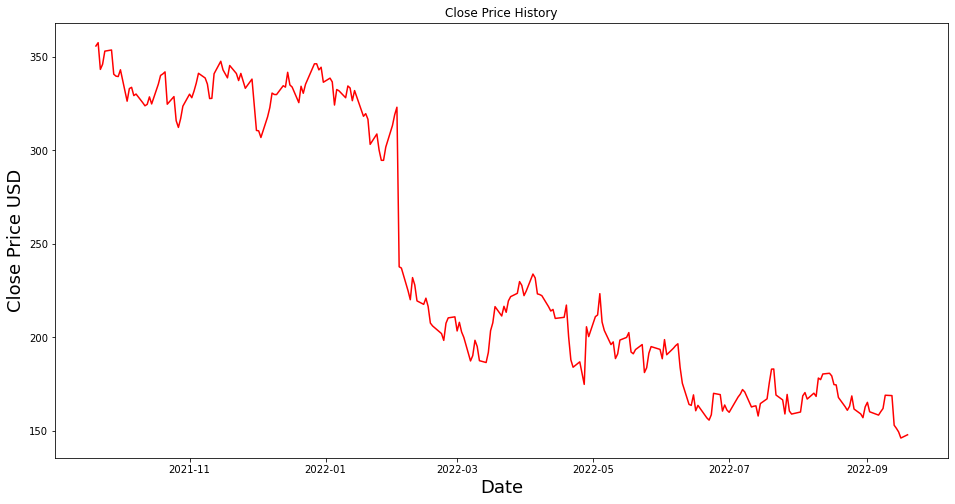

In [54]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(Data['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [55]:
Shares_price = pd.DataFrame(Data["Close"]).rename(columns={"Close": "Price"})  
Shares_price.head(10)

,Price
Date,
2021-09-20,355.700012
2021-09-21,357.480011
2021-09-22,343.209991
2021-09-23,345.959991
2021-09-24,352.959991
2021-09-27,353.579987
2021-09-28,340.649994
2021-09-29,339.609985
2021-09-30,339.390015


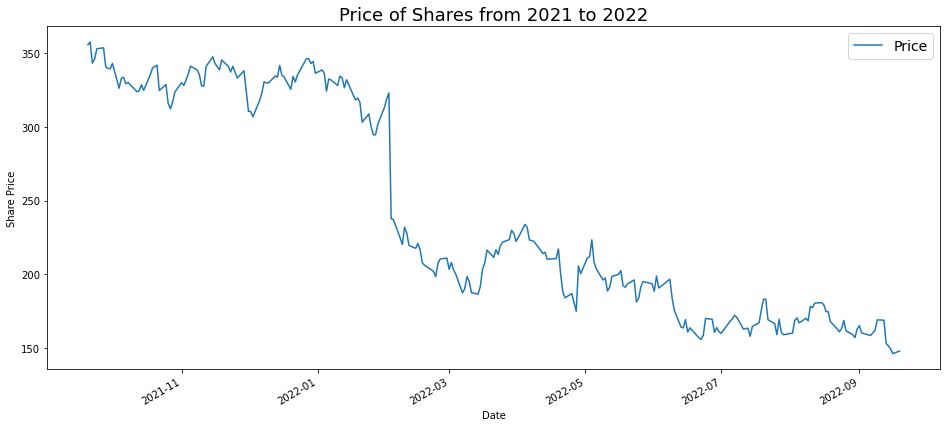

In [56]:
import matplotlib.pyplot as plt
Shares_price.plot(figsize=(16, 7))
plt.xlabel('Date')
plt.ylabel("Share Price")
plt.title("Price of Shares from 2021 to 2022", fontsize=18)
plt.legend(fontsize=14);

In [57]:
timesteps = Shares_price.index.to_numpy()
prices = Shares_price["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2021-09-20T00:00:00.000000000', '2021-09-21T00:00:00.000000000',
        '2021-09-22T00:00:00.000000000', '2021-09-23T00:00:00.000000000',
        '2021-09-24T00:00:00.000000000', '2021-09-27T00:00:00.000000000',
        '2021-09-28T00:00:00.000000000', '2021-09-29T00:00:00.000000000',
        '2021-09-30T00:00:00.000000000', '2021-10-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([355.700012, 357.480011, 343.209991, 345.959991, 352.959991,
        353.579987, 340.649994, 339.609985, 339.390015, 343.01001 ]))

In [58]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(201, 51, 201, 51)

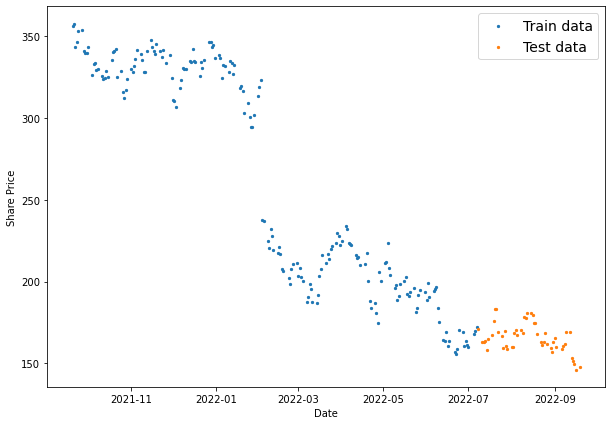

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Share Price")
plt.legend(fontsize=14)
plt.show();

In [60]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Share Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

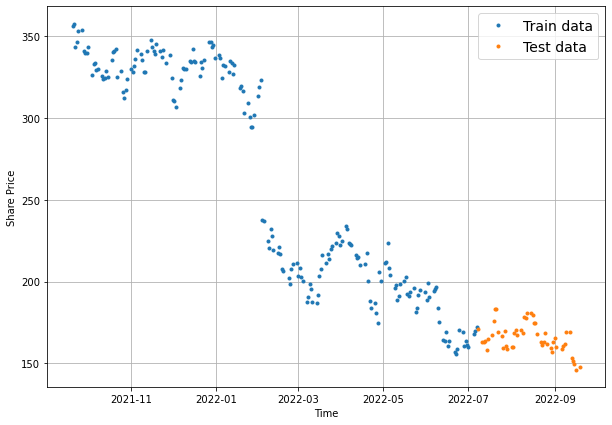

In [61]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [62]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [63]:
def get_labelled_windows(x, horizon=1):
      
  return x[:, :-horizon], x[:, -horizon:]

In [64]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [65]:
def make_windows(x, window_size=7, horizon=1):
      
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [66]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(222, 222)

In [67]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [355.700012 357.480011 343.209991 345.959991 352.959991 353.579987
 340.649994 339.609985 339.390015 343.01001  326.230011 332.959991
 333.640015 329.220001 330.049988 325.450012 323.769989 324.540009
 328.529999 324.76001  335.339996 339.98999  340.779999 341.880005
 324.609985 328.690002 315.809998 312.220001 316.920013 323.570007] -> Label: [329.980011]
Window: [357.480011 343.209991 345.959991 352.959991 353.579987 340.649994
 339.609985 339.390015 343.01001  326.230011 332.959991 333.640015
 329.220001 330.049988 325.450012 323.769989 324.540009 328.529999
 324.76001  335.339996 339.98999  340.779999 341.880005 324.609985
 328.690002 315.809998 312.220001 316.920013 323.570007 329.980011] -> Label: [328.079987]
Window: [343.209991 345.959991 352.959991 353.579987 340.649994 339.609985
 339.390015 343.01001  326.230011 332.959991 333.640015 329.220001
 330.049988 325.450012 323.769989 324.540009 328.529999 324.76001
 335.339996 339.98999  340.779999 341.880005 324.609985 32

In [68]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [168.800003 170.570007 167.110001 170.25     168.529999 178.339996
 177.490005 180.5      180.889999 179.470001 174.850006 174.660004
 167.960007 163.050003 161.110001 163.259995 168.779999 161.779999
 159.169998 157.160004 162.929993 165.360001 160.320007 158.539993
 160.389999 162.059998 169.149994 168.960007 153.130005 151.470001] -> Label: [149.550003]
Window: [170.570007 167.110001 170.25     168.529999 178.339996 177.490005
 180.5      180.889999 179.470001 174.850006 174.660004 167.960007
 163.050003 161.110001 163.259995 168.779999 161.779999 159.169998
 157.160004 162.929993 165.360001 160.320007 158.539993 160.389999
 162.059998 169.149994 168.960007 153.130005 151.470001 149.550003] -> Label: [146.289993]
Window: [167.110001 170.25     168.529999 178.339996 177.490005 180.5
 180.889999 179.470001 174.850006 174.660004 167.960007 163.050003
 161.110001 163.259995 168.779999 161.779999 159.169998 157.160004
 162.929993 165.360001 160.320007 158.539993 160.389999 162.05

In [69]:
def mean_absolute_scaled_error(y_true, y_pred):
      mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
      mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)
      return mae / mae_naive_no_season

In [70]:
def evaluate_preds(y_true, y_pred):
      # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [71]:
def make_train_test_splits(windows, labels, test_split=0.2):
    
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [72]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(177, 45, 177, 45)

In [73]:
train_windows[:5], train_labels[:5]

(array([[355.700012, 357.480011, 343.209991, 345.959991, 352.959991,
         353.579987, 340.649994, 339.609985, 339.390015, 343.01001 ,
         326.230011, 332.959991, 333.640015, 329.220001, 330.049988,
         325.450012, 323.769989, 324.540009, 328.529999, 324.76001 ,
         335.339996, 339.98999 , 340.779999, 341.880005, 324.609985,
         328.690002, 315.809998, 312.220001, 316.920013, 323.570007],
        [357.480011, 343.209991, 345.959991, 352.959991, 353.579987,
         340.649994, 339.609985, 339.390015, 343.01001 , 326.230011,
         332.959991, 333.640015, 329.220001, 330.049988, 325.450012,
         323.769989, 324.540009, 328.529999, 324.76001 , 335.339996,
         339.98999 , 340.779999, 341.880005, 324.609985, 328.690002,
         315.809998, 312.220001, 316.920013, 323.570007, 329.980011],
        [343.209991, 345.959991, 352.959991, 353.579987, 340.649994,
         339.609985, 339.390015, 343.01001 , 326.230011, 332.959991,
         333.640015, 329.220001,

In [74]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [75]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [76]:
import tensorflow as tf
from keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
2/2 [==============================] - 1s 866ms/step - loss: 366.7209 - mae: 366.7209 - val_loss: 183.7510 - val_mae: 183.7510
Epoch 2/100
2/2 [==============================] - 1s 1s/step - loss: 254.1113 - mae: 254.1113 - val_loss: 111.6487 - val_mae: 111.6487
Epoch 3/100
2/2 [==============================] - 1s 1s/step - loss: 142.8101 - mae: 142.8101 - val_loss: 38.5351 - val_mae: 38.5351
Epoch 4/100
2/2 [==============================] - 1s 1s/step - loss: 41.7233 - mae: 41.7233 - val_loss: 31.2822 - val_mae: 31.2822
Epoch 5/100
2/2 [==============================] - 0s 70ms/step - loss: 71.2913 - mae: 71.2913 - val_loss: 60.3151 - val_mae: 60.3151
Epoch 6/100
2/2 [==============================] - 0s 113ms/step - loss: 108.5901 - mae: 108.5901 - val_loss: 58.2098 - val_mae: 58.2098
Epoch 7/100
2/2 [==============================] - 0s 137ms/step - loss: 100.6251 - mae: 100.6251 - val_loss: 37.0694 - val_mae: 37.0694
Epoch 8/100
2/2 [==============================] - 

In [77]:
model_1.evaluate(test_windows, test_labels)

2/2 [==============================] - 0s 5ms/step - loss: 6.8843 - mae: 6.8843


[6.884301662445068, 6.884301662445068]

In [78]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

2/2 [==============================] - 0s 3ms/step - loss: 6.4310 - mae: 6.4310


[6.431033611297607, 6.431033611297607]

In [79]:
def make_preds(model, input_data):
    
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [80]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

2/2 [==============================] - 0s 5ms/step


(45,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([158.88368, 161.81558, 158.12086, 163.99132, 167.10742, 172.35475,
        174.03603, 169.2701 , 163.40059, 163.55501], dtype=float32)>)

In [81]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 6.4310346,
 'mse': 67.66394,
 'rmse': 8.225809,
 'mape': 3.8568468,
 'mase': 1.5377725}

In [83]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [84]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(222, 222)

In [85]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [86]:
model_2.evaluate(test_windows, test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 6.4965


6.496527194976807

In [87]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

2/2 [==============================] - 1s 9ms/step - loss: 6.4659


6.465871810913086

In [88]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

2/2 [==============================] - 0s 4ms/step


In [89]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 6.4658704,
 'mse': 64.74456,
 'rmse': 8.0464,
 'mape': 3.8942099,
 'mase': 1.5461024}

In [91]:
# Block reward values
block_reward_1 = 50 
block_reward_2 = 25 
block_reward_3 = 12.5 
block_reward_4 = 6.25 

block_reward_2_datetime = np.datetime64("2021-09-20")
block_reward_3_datetime = np.datetime64("2021-12-20")
block_reward_4_datetime = np.datetime64("2022-02-20")

In [92]:
block_reward_2_days = (block_reward_3_datetime - Shares_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - Shares_price.index[0]).days
block_reward_2_days, block_reward_3_days

(91, 153)

In [93]:
Meta_prices_block = Shares_price.copy()
Meta_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
Meta_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
Meta_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
Meta_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
Meta_prices_block.head()

,Price,block_reward
Date,,
2021-09-20,355.700012,25
2021-09-21,357.480011,25
2021-09-22,343.209991,25
2021-09-23,345.959991,25
2021-09-24,352.959991,25


In [94]:
Meta_prices_windowed = Meta_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  Meta_prices_windowed[f"Price+{i+1}"] = Meta_prices_windowed["Price"].shift(periods=i+1)
Meta_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8,...,Price+21,Price+22,Price+23,Price+24,Price+25,Price+26,Price+27,Price+28,Price+29,Price+30
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-20,355.700012,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-21,357.480011,25,355.700012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,343.209991,25,357.480011,355.700012,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-23,345.959991,25,343.209991,357.480011,355.700012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-24,352.959991,25,345.959991,343.209991,357.480011,355.700012,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-27,353.579987,25,352.959991,345.959991,343.209991,357.480011,355.700012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-28,340.649994,25,353.579987,352.959991,345.959991,343.209991,357.480011,355.700012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-29,339.609985,25,340.649994,353.579987,352.959991,345.959991,343.209991,357.480011,355.700012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,339.390015,25,339.609985,340.649994,353.579987,352.959991,345.959991,343.209991,357.480011,355.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Train model on entire data to make prediction for the next day 
X_all = Meta_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = Meta_prices_windowed.dropna()["Price"].to_numpy()

In [96]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [97]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_3.fit(dataset_all,
            epochs=100,
            verbose=0)

In [144]:
INTO_FUTURE = 80

In [145]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
      
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [146]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_3,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)


1/1 [==============================] - 0s 97ms/step
Predicting on: 
 [170.25     168.529999 178.339996 177.490005 180.5      180.889999
 179.470001 174.850006 174.660004 167.960007 163.050003 161.110001
 163.259995 168.779999 161.779999 159.169998 157.160004 162.929993
 165.360001 160.320007 158.539993 160.389999 162.059998 169.149994
 168.960007 153.130005 151.470001 149.550003 146.289993 148.020004] -> Prediction: 172.69285583496094

1/1 [==============================] - 0s 41ms/step
Predicting on: 
 [168.529999   178.339996   177.490005   180.5        180.889999
 179.470001   174.850006   174.660004   167.960007   163.050003
 161.110001   163.259995   168.779999   161.779999   159.169998
 157.160004   162.929993   165.360001   160.320007   158.539993
 160.389999   162.059998   169.149994   168.960007   153.130005
 151.470001   149.550003   146.289993   148.020004   172.69285583] -> Prediction: 171.31021118164062

1/1 [==============================] - 0s 72ms/step
Predicting on: 
 

In [147]:
future_forecast[:10]

[172.69286,
 171.31021,
 175.33977,
 171.33252,
 170.6298,
 171.53917,
 171.64027,
 165.94543,
 163.92914,
 160.811]

In [148]:
def get_future_dates(start_date, into_future, offset=1):
      
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") 

In [149]:
last_timestep = Shares_price.index[-1]
last_timestep

Timestamp('2022-09-19 00:00:00')

In [150]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23',
       '2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27',
       '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01',
       '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05',
       '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09',
       '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
       '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
       '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
       '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
       '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
       '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
       '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
       '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
       '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14',
       '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
       '2022-11-19', '2022-11-20', '2022-11-21', '2022-

In [151]:
import csv
from datetime import datetime

timesteps = []
Meta_price = []
with open("./META.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(Data.index[-1]) # get the dates as dates (not strings), strptime = string parse time
    Meta_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], Meta_price[:10]

([Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-09-19 00:00:00')],
 [361.029999,
  360.040009,
  349.839996,
  349.670013,
  354.350006,
  355.149994,
  349.600006,
  345.230011,
  342.799988,
  345.019989])

In [152]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, Meta_price[-1])
next_time_steps, future_forecast

(array(['2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
        '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26',
        '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
        '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
        '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
        '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
        '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
        '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
        '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24',
        '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
        '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
        '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
        '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09',
        '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13',
        '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
        '2022-11-18', '2022-11-19', '202

In [153]:
Shares_price.shape

(252, 1)

In [154]:
next_time_steps

array(['2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
       '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26',
       '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
       '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
       '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
       '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
       '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
       '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24',
       '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
       '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
       '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
       '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09',
       '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13',
       '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
       '2022-11-18', '2022-11-19', '2022-11-20', '2022-

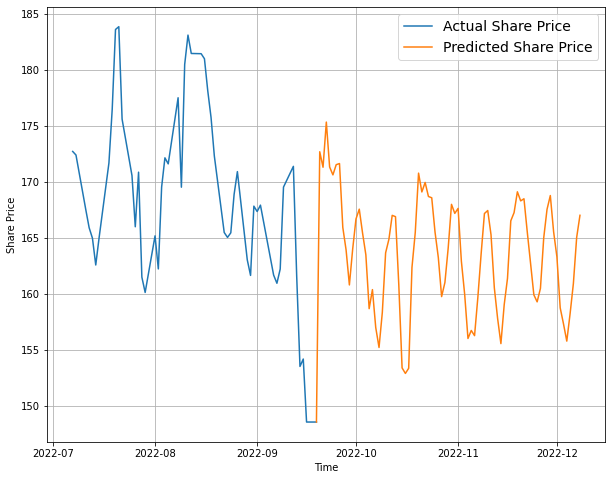

In [155]:
plt.figure(figsize=(10, 8))
plot_time_series(Shares_price.index, Meta_price, start=200, format="-", label="Actual Share Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted Share Price")